# Get physio data #

Let's start by adding the necessary packages. This is not yet an official python package, so the pycequeau folder need to be added using the next code block:

In [25]:
import sys
sys.path.append('../../../src')

Now, we start using the `physiographic` module

In [4]:
from src.physiographic.base import Basin

Before start using the toolbox, you need to set up the working directory project. To do so, we need to run this code lines and the toolbox will create the project folder structure as follows:

```
Project/
|-- geographic/
|-- meteo/
|-- results/
```


In [ ]:
project_folder = "path/to/your/project/"
files_list = ["DEM.tif",  # DEM file
              "FAC.tif",  # Flow accumulation file
              "LC.tif",  # Land cover file
              "Watershed.shp",  # Watershed shp file
              "CAT.shp",  # Sub basins shp file
              "WaterBodies.shp",  # Waterbodies as shp file
              "Wetlands.shp"]  # Wetlands locations as shp file
# 2- Create basin Object:
basin = Basin(project_folder,
              "Melezes", #Basin name
              files_list)


In this point, you need to place all the files contained in the list `files_list` into the `geographic` folder. It is very straight forward to use the toolbox by running the next chain of instructions. 

In [ ]:
# 3 - Select Fisnet dimensions. This dimenssions are given in m
basin.set_dimenssions(7500, 7500)

In [ ]:
# 4 - Create CE and CP fishnet
basin.create_CEfishnet()
basin.create_CPfishnet()

In [ ]:
# 5 - Remove the small CPs in the basin
basin.polish_CPfishnet()

In [ ]:
# 6 - Do the routing process
basin.CP_routing()

In [ ]:
# 7 - Create the carreaux entiers structure
basin.carreauxEntiers_struct()

In [ ]:
# 8 - Create carreux partiels structure
basin.carreauxPartiels_struct()

In [ ]:
# 8 - Create the bassinVersant structure
basin.create_bassinVersant_structure()

Now, let's graph some of the obtained results. First, we will plot the CE fishnet renumbered with the correct CE id

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
project_folder = "path/to/your/project/"
CE_fishnet = gpd.read_file(os.path.join(project_folder,"geographic","CE_fishnet.shp"))
CE_fishnet.head()

,CEid,newCEid,altitude,i,j,geometry
0,1319,1,82.444036,42,44,"POLYGON ((-67369.748 1519800.826, -59869.748 1..."
1,1320,2,149.754697,42,43,"POLYGON ((-67369.748 1512300.826, -59869.748 1..."
2,1318,3,224.575743,42,45,"POLYGON ((-67369.748 1527300.826, -59869.748 1..."
3,1278,4,135.562160,41,44,"POLYGON ((-74869.748 1519800.826, -67369.748 1..."
4,1277,5,166.115744,41,45,"POLYGON ((-74869.748 1527300.826, -67369.748 1..."


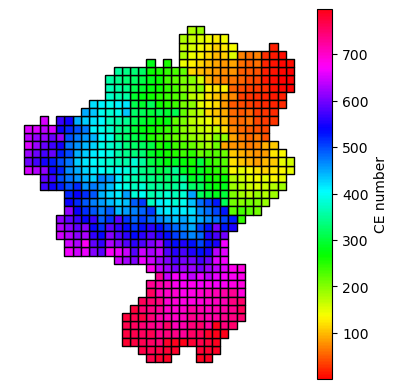

In [65]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# Axis
CE_fishnet.plot(column='newCEid', cmap='hsv', ax=ax, legend=True, cax=cax,
                legend_kwds={'label': "CE number",
                        'orientation': "vertical"},
                edgecolor='black')
ax.set_axis_off();

Now, let's do the same with the CP fishnet

In [22]:
CP_fishnet = gpd.read_file(os.path.join(project_folder,"geographic","CP_fishnet.shp"))
CP_fishnet.head()

,CEid,DN,CATid,Area,Dissolve,maxFAC,CPid,newCPid,newCEid,pctSurface,cumulPctSu,altitude,i,j,geometry
0,1319,8.0,45.0,1.821068e+07,0,100867783.0,838,1,1,32.374539,71585.681728,74.417991,42,44,"POLYGON ((-66677.780 1512300.826, -67369.748 1..."
1,1320,8.0,45.0,4.350096e+06,0,4659.0,840,2,2,7.733503,7.733503,198.011311,42,43,"POLYGON ((-67369.748 1512300.826, -66677.780 1..."
2,1318,6.0,3.0,2.530885e+07,0,619505.0,841,3,3,44.993511,452.521783,184.369095,42,45,"POLYGON ((-67369.748 1527300.826, -65417.822 1..."
3,1278,42.0,3.0,1.576898e+07,0,100149228.0,843,4,4,28.033743,71093.051903,101.829598,41,44,"POLYGON ((-69217.695 1514842.011, -69197.696 1..."
4,1277,6.0,3.0,3.882579e+07,0,600976.0,844,5,5,69.023622,407.528272,151.070935,41,45,"POLYGON ((-74277.526 1527300.826, -67369.748 1..."


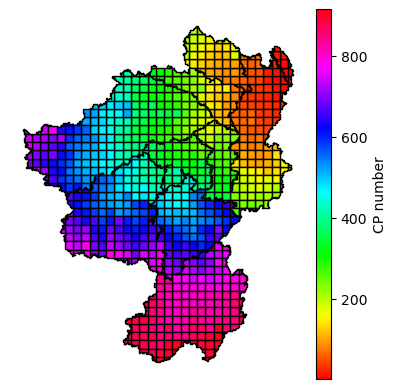

In [26]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
CP_fishnet.plot(column='newCPid', cmap='hsv', ax=ax, legend=True, cax=cax,
                legend_kwds={'label': "CP number",
                        'orientation': "vertical"},
                edgecolor='black')
ax.set_axis_off();

The bassinVersant strcuture is saved as a `.json` file that contains all the information to make the CEQUEAU model run either in the Matlab environment, or the OpenCEQUEAU version (which is currently under development also). In order to visualize this structure, we need to import the `json` package and follow the next next instructions:

In [39]:
import json
from IPython.display import JSON


with open(os.path.join(project_folder,"results","bassinVersant.json")) as datafile:
  bassinVersant = json.load(datafile)
# print(json.dumps(bassinVersant, indent=2))
# Acces to the CarreuzEntier data
keys_CE = bassinVersant["carreauxEntiers"].keys()
print(keys_CE)
# Acces to any of the names inside the data object:
altitude = bassinVersant["carreauxEntiers"]["altitude"]
i = bassinVersant["carreauxEntiers"]["i"]
j = bassinVersant["carreauxEntiers"]["j"]
print(altitude)
print(i)
print(j)

dict_keys(['CEid', 'i', 'j', 'pctLacRiviere', 'pctForet', 'pctMarais', 'pctSolNu', 'altitude'])
[82.44403603351303, 149.75469672571123, 224.57574272445098, 135.56216014376065, 166.11574365796167, 191.84061471679618, 150.50007001330252, 198.44442110667694, 249.8774067072744, 243.588531821046, 234.17395971901328, 162.09925552521645, 231.923498798105, 238.0593479427758, 232.19185978669282, 141.22344745501644, 277.2323508133212, 241.01103876403184, 251.72809167075079, 194.2004714229037, 63.341145651007025, 279.2653737543467, 235.16495134075475, 205.06133165301407, 133.57749305701415, 219.46052416625827, 73.31052066559313, 244.1421736796658, 193.24007561436673, 177.51231067236108, 133.28990174799878, 187.35922658638475, 183.44869191813112, 197.21062335177018, 283.2818035426731, 117.80020537235409, 219.74648183154798, 225.56517071576934, 207.34742934490887, 226.19995799201848, 291.96513337534134, 199.9378515251231, 179.8437186398749, 243.1251137716166, 232.7113351536792, 316.9602791196994, 2